## DAY1の宿題

- 目的変数と説明変数の関係を確認するためのグラフを作成する

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

In [30]:
# データの読み込み
measurements = pd.read_csv(r"C:\Users\yonkei\Documents\car-consume\measurements.csv")
# 欠損値を0に置換
measurements.fillna(value={'temp_inside':'0','specials':'0','refill liters':'0','refill gas':'0'},inplace = True)

display(ameasurements.head())
ameasurements.describe()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,0,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,0,E10,0,0,0,0,0
2,"11,2","5,5",38,"21,5",15,0,E10,0,0,0,0,0
3,"12,9","3,9",36,"21,5",14,0,E10,0,0,0,0,0
4,"18,5","4,5",46,"21,5",15,0,E10,0,0,0,0,0


,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


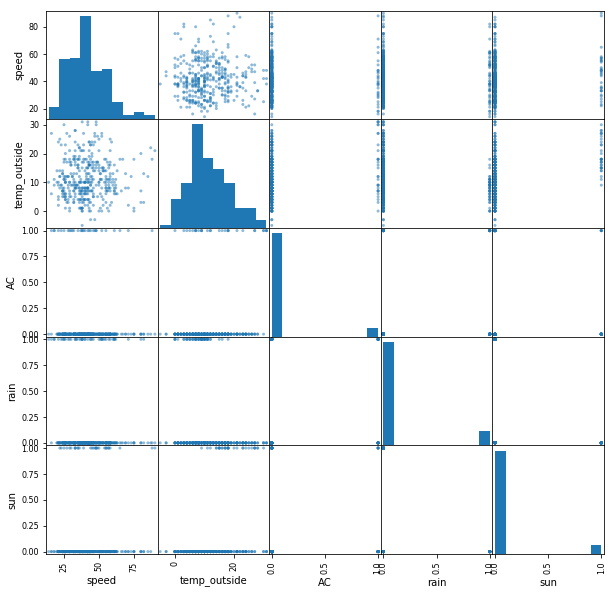

In [31]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(measurements, figsize=(10,10))
plt.show()

In [32]:
# 相関係数を確認
measurements.corr()

,speed,temp_outside,AC,rain,sun
speed,1.000000,0.015411,-0.035408,0.009489,0.081618
temp_outside,0.015411,1.000000,0.167562,-0.186315,0.346903
AC,-0.035408,0.167562,1.000000,0.242915,0.088598
rain,0.009489,-0.186315,0.242915,1.000000,-0.112650
sun,0.081618,0.346903,0.088598,-0.112650,1.000000


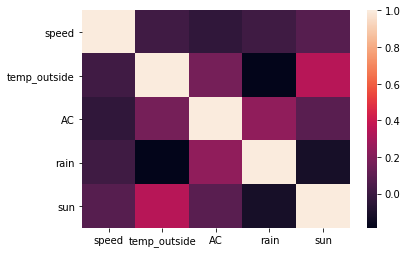

In [33]:
# 相関係数をヒートマップにして可視化
sns.heatmap(measurements.corr())
plt.show()

「距離 distance」と「速度 speed」を用いて「100kmあたりℓの消費量 consume」の説明を試みる．

In [34]:
# 係数を求める
y = measurements["consume"].values
X = measurements[['distance', 'speed']].values
regr = LinearRegression(fit_intercept=True)

regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]

ValueError: could not convert string to float: '14,7'